# Final Project - Predicting Diabetes Diagnosis
Neil Kanungo | UC Berkeley Extension | December 2022

### Introduction
This analysis uses the kaggle dataset on diabetes risk factors and diagnoses (https://www.kaggle.com/datasets/whenamancodes/predict-diabities) to build a model that can predict future diabetes diagnosis. The Jupyter Notebook below details an EDA Exploratory Data Analysis approach, model building with several methods, and metrics that evaluate the model performance. The resulting model may be used in real-world scenarios to predict diabetes diagnoses with 83.5% accuracy.

### Loading Libraries and Data
The first step in our analysis is to load necessary data manipulation libraries ('pandas' and 'numpy') then load our dataset. The dataset has previously been downloaded in CSV format and is stored in the Jupyter Notebook folder with this notebook. We will take an initial view of the data before proceeding to Exploratory Data Analysis.

In [1]:
# Load Libraries
import pandas as pd
import numpy as np

# Load Dataset
df = pd.read_csv('diabetes.csv')

# Display the dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Above, we see risk factors such as: Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin level, BMI, and Age. We see the diagnosis in the 'Outcome' column.

### Exploratory Data Analysis
We'll now explore our data in python. We'll observe datatypes, evaluate different statistical summary measures, visualize distributions, and determine the quality of our dataset. This will be useful before building our model(s) because we will know if the dataset is fit for modeling or if data cleaning and transformations are needed first.

In [2]:
# View datatypes and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We see above that there are 768 data points in our dataset, and no null values. All columns are numeric, with most being integer values.

In [3]:
# Display statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The above statistical summary shows means near the 50th percentile for: Pregnancies, Glucose, Blood Pressure, Skin Thickness, and BMI. We expect these columns to be normally distributed, however, let us visualize this to better understand the distribtutions of univariate and bivariate data.

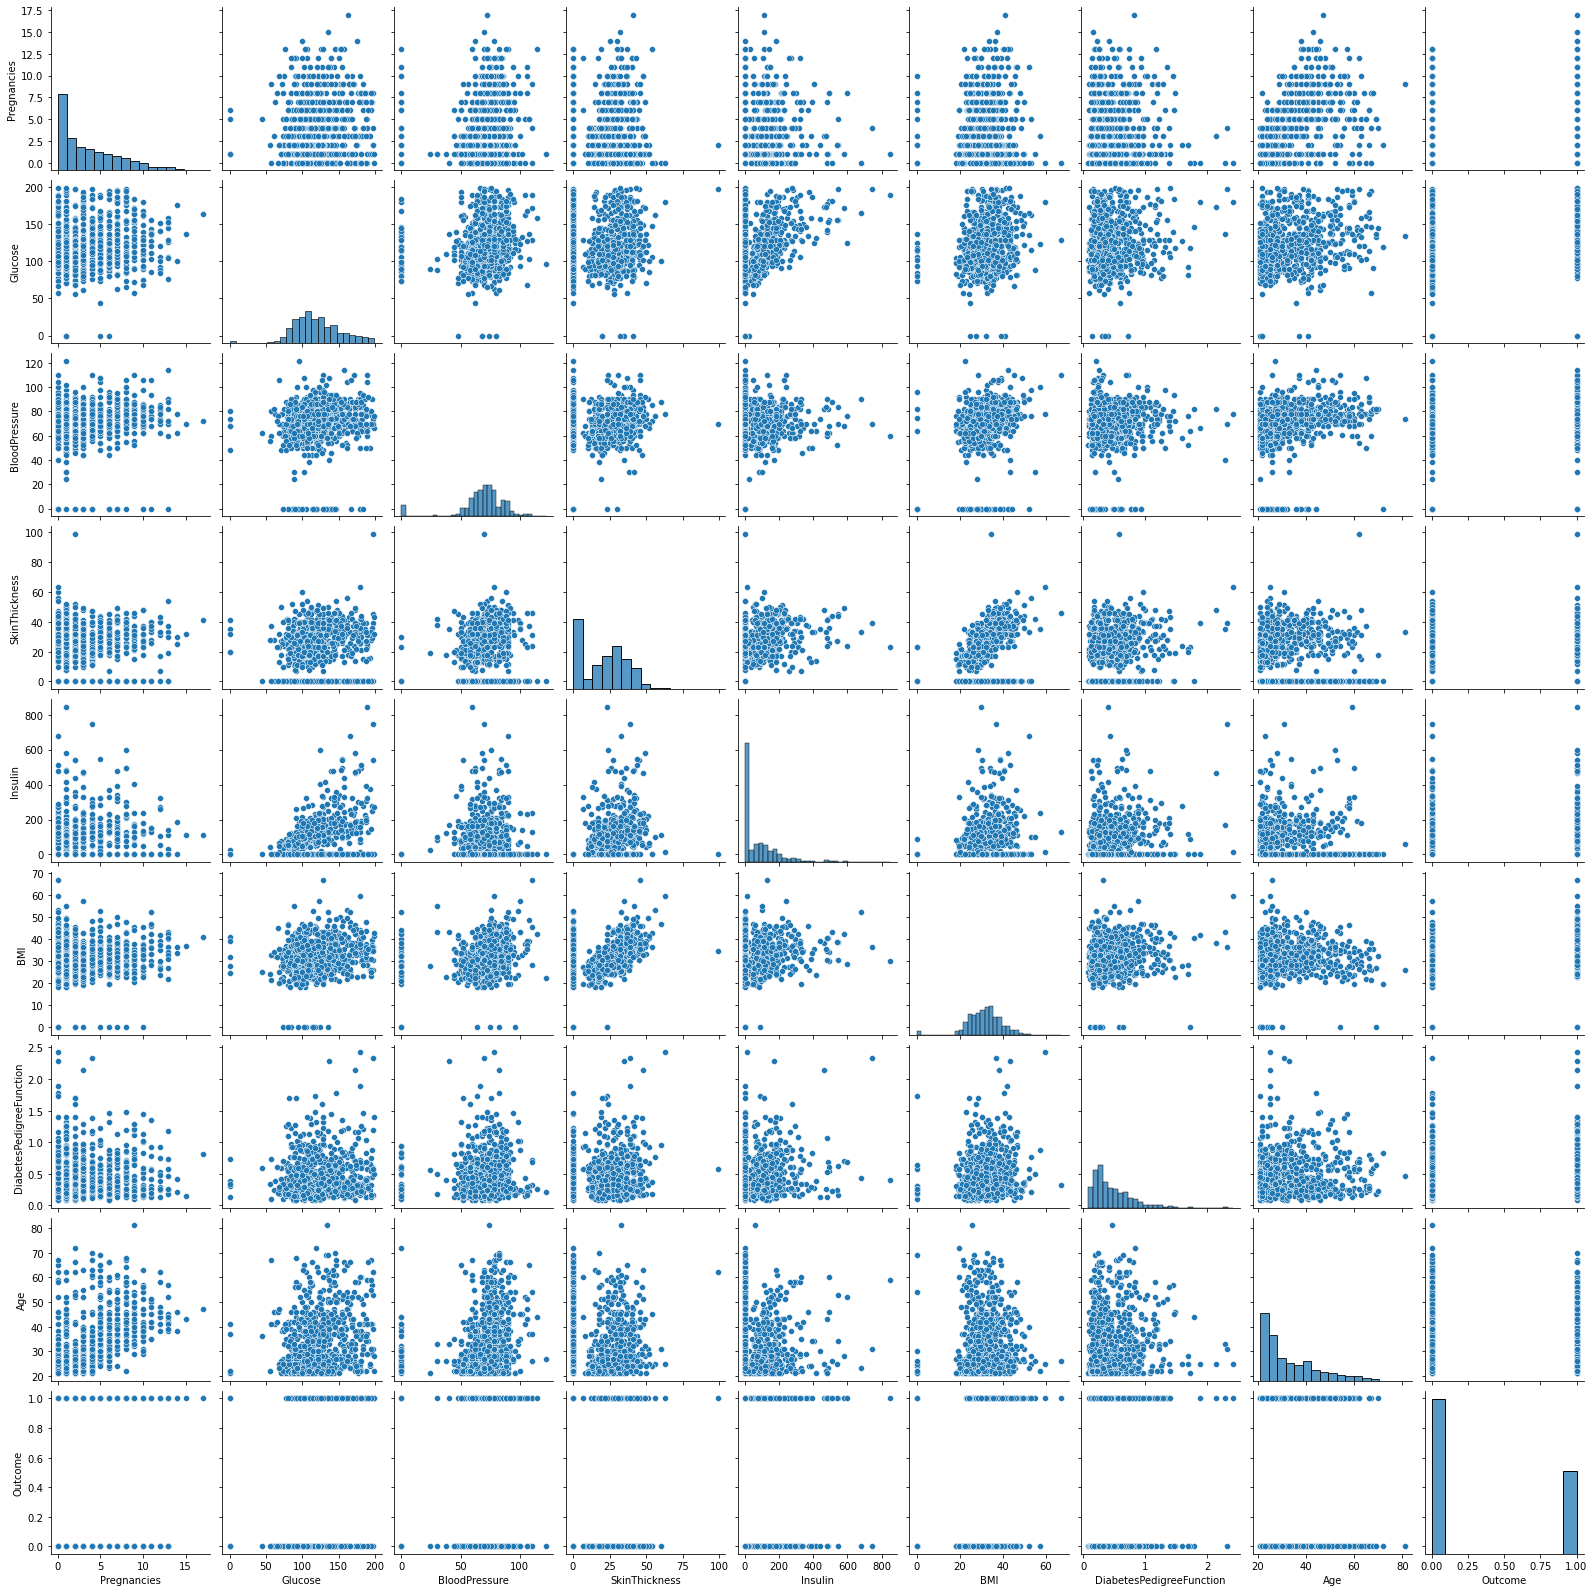

In [4]:
import seaborn as sns

sns.pairplot(df)

Here we see some outlier information. For 'SkinThickness' and 'Insulin', there are many values for 0. This could mean that before acquiring this dataset, empty values were substituted with 0 since it is unlikely so many samples are truly 0, and furthermore, a value of 0 doesn't make sense for these columns which should be non-zero.

Let us remove the rows with 0 for these columns:

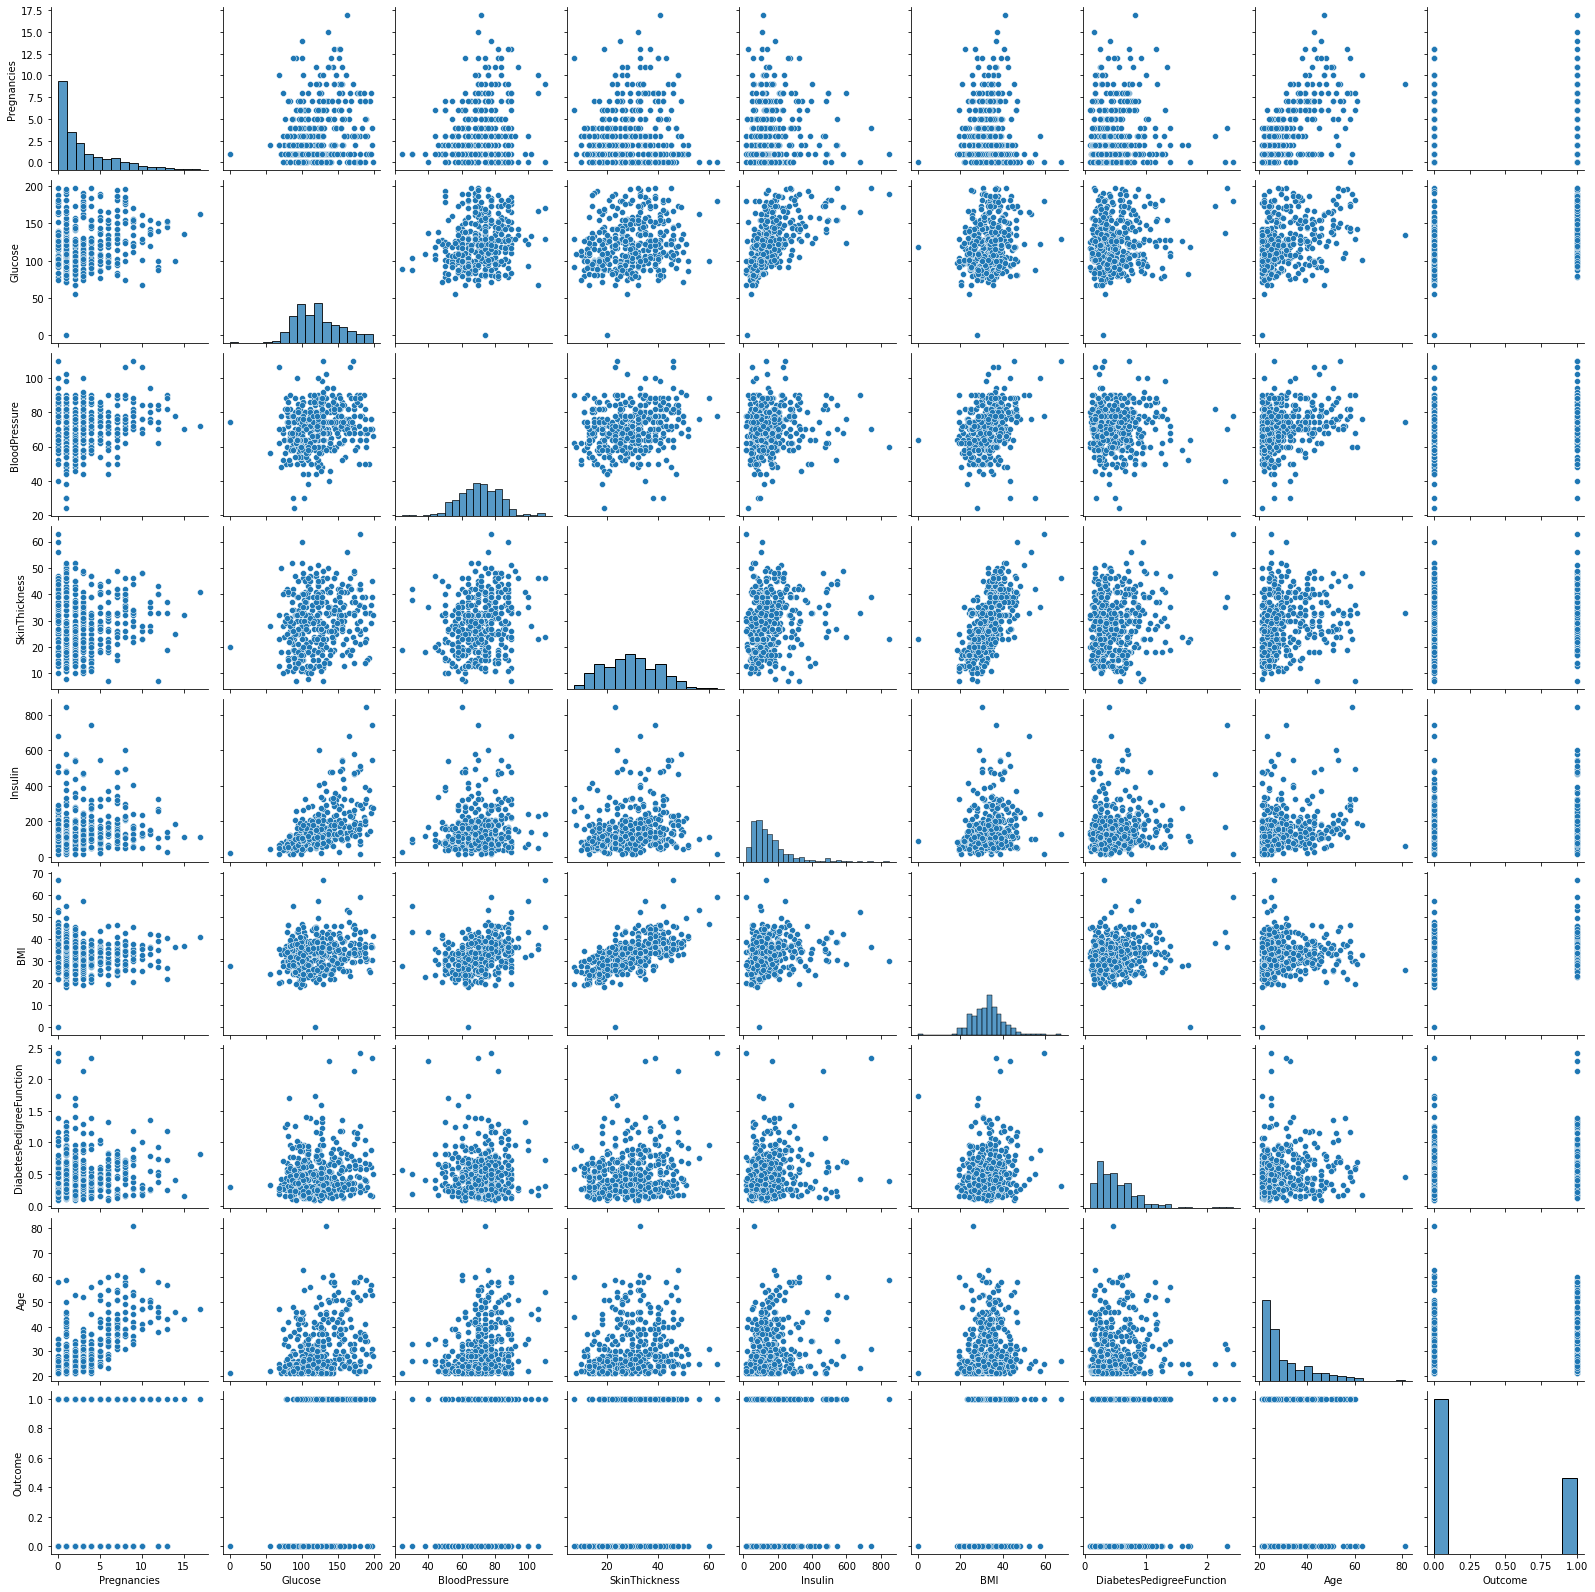

In [5]:
# remove rows equal to 0 in 'SkinThickness' and 'Insulin' columns
df = df.loc[(df['SkinThickness'] > 0) & (df['Insulin']>0)]

# Re-visualize the SPLOM
sns.pairplot(df)

Our univariate distributions look much better now. We also see some positive correlations. We could visualize these individual bivariate plots to illustrate the correlations, however, I will instead use a correlation matrix so we can visualize all correlations as a heatmap:

<AxesSubplot:>

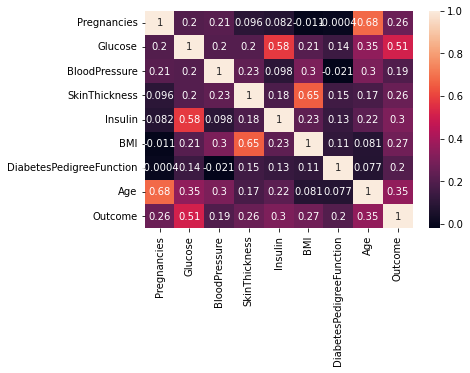

In [6]:
# Build correlation matrix
corr = df.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True)

We see moderately strong positive correlations for: Age vs Pregnancies, Insulin vs Glucose, and SkinThickness vs BMI. The diagnosis column, 'Outcome', has the highest correlation with the 'Glucose' column.

We are now ready to start building our models.

### Modeling Diagnoses

Here, we will use a variety of classification algorithms to see if we can predict the 'Outcome' column. We will use: Logistic Regression, Support Vector Classification, and Naive Bayes. We first will need to separate our data into train/test splits.

In [7]:
# Create Train/Test Split on data
from sklearn.model_selection import train_test_split
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

Since not all columns were uniformly distributed, we'll use a Standard Scalar before fitting our model

In [8]:
# Load the Standard Scaler Library
from sklearn.preprocessing import StandardScaler

# Fit the scalar on the training set
scaler = StandardScaler()
scaler.fit(x_train)

# Transform the training and test sets using the scaler
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

Now, let's fit a Logistic Regression model and predict Outcomes:

In [9]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression classifier
logreg = LogisticRegression(penalty="l2", C=1, solver='lbfgs')

y_train = np.array(y_train).flatten()

# Train the model using the training sets
logreg.fit(x_train_sc, y_train)

# Predict the response for the test data
ypred_logreg = logreg.predict(x_test_sc)

print(ypred_logreg)

[0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0]


Now, let's fit a Support Vector Machine and predict Outcomes:

In [10]:
from sklearn.svm import SVC

#Create the SVC Classifier
svclassifier = SVC(kernel='poly')

# Train the model using the training sets
svclassifier.fit(x_train_sc, y_train) 

# Predict the response for the test data
ypred_svc = svclassifier.predict(x_test_sc)

print(ypred_svc)

[0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0]


Now let's fit a Naive-Bayes Classifier and predict Outcomes:

In [11]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(x_train_sc, y_train)

# Predict the response for test data
ypred_nb = gnb.predict(x_test_sc)

print(ypred_nb)

[0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0]


### Evaluating the Models

With our models developed for Logistic Regression, Support Vector Classification, and Naive Bayes, let's generate predictions and evaluate the results.

In [12]:
# Logistic Regression:
ypred_logreg = logreg.predict(x_test_sc)

# Support Vector Classification:
ypred_svc = svclassifier.predict(x_test_sc)

# Naive-Bayes Classification:
ypred_nb = gnb.predict(x_test_sc)

Logistic Regression Results:


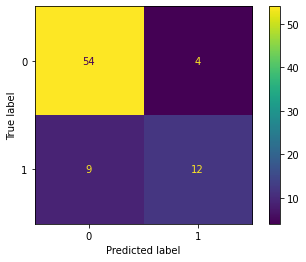

Base rate accuracy is: 0.8354
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        58
           1       0.75      0.57      0.65        21

    accuracy                           0.84        79
   macro avg       0.80      0.75      0.77        79
weighted avg       0.83      0.84      0.83        79



In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score
import matplotlib.pyplot as plt

print("Logistic Regression Results:")
cm_lr = confusion_matrix(y_test, ypred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=logreg.classes_) 
disp.plot()
plt.show()

print("Base rate accuracy is: %0.4f" %(accuracy_score(y_test, ypred_logreg)))
print(classification_report(y_test,ypred_logreg))

Support Vector Classsifier Results:


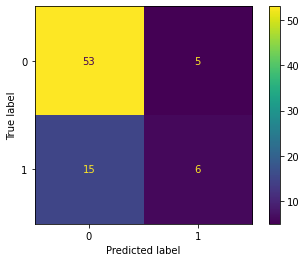

Base rate accuracy is: 0.7468
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        58
           1       0.55      0.29      0.37        21

    accuracy                           0.75        79
   macro avg       0.66      0.60      0.61        79
weighted avg       0.72      0.75      0.72        79



In [15]:
print("Support Vector Classsifier Results:")
cm_svc = confusion_matrix(y_test, ypred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svclassifier.classes_) 
disp.plot()
plt.show()

print("Base rate accuracy is: %0.4f" %(accuracy_score(y_test, ypred_svc)))
print(classification_report(y_test,ypred_svc))

Naive-Bayes Classifier Results:


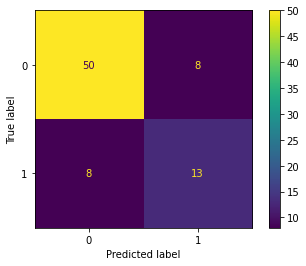

Base rate accuracy is: 0.7975
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.62      0.62      0.62        21

    accuracy                           0.80        79
   macro avg       0.74      0.74      0.74        79
weighted avg       0.80      0.80      0.80        79



In [16]:
print("Naive-Bayes Classifier Results:")
cm_nb = confusion_matrix(y_test, ypred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=gnb.classes_) 
disp.plot()
plt.show()

print("Base rate accuracy is: %0.4f" %(accuracy_score(y_test, ypred_nb)))
print(classification_report(y_test,ypred_nb))

Finally, a summary of accuracies for each model:

In [17]:
print("Logistic Regression Accuracy: %0.4f" %(accuracy_score(y_test, ypred_logreg)))
print("Suppor Vector Accuracy: %0.4f" %(accuracy_score(y_test, ypred_svc)))
print("Naive-Bayes Accuracy: %0.4f" %(accuracy_score(y_test, ypred_nb)))

Logistic Regression Accuracy: 0.8354
Suppor Vector Accuracy: 0.7468
Naive-Bayes Accuracy: 0.7975


### Conclusion
All models perfomed fairly well, with the lowest accuracy being 75% and the highest being 84%. Overall, we were able to successfully build all 3 models and compare them. Converting categorical values to numerical was not needed since all inputs were numeric. We removed outliers in a couple columns. We did not use any hyperparameter tuning, which might improve the performance of these models. The best model was the Logistic Regression model with an accuracy of 84%.

Using this logistic regression model on future data may help predict diabetes with good confidence. We might see if we can improve the model by using more predictor columns, using hyperparameter tuning, or attaining more samples. Overall, we have good performance by each model.